In [10]:
import os
from glob import glob
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from IPython import display

In [2]:
project_dir = os.path.abspath("_projects/madina")
output_dir = os.path.join(project_dir, "output/v001")
model_dir = output_dir
test_dir = os.path.join(project_dir, "input/faces_256/test")
test_female_dir = os.path.join(test_dir, "female")
test_male_dir = os.path.join(test_dir, "male")
print(project_dir)

/tf/_projects/madina


In [3]:
gen_f2m = tf.saved_model.load(os.path.join(model_dir, 'generator_female_to_male'))

In [33]:
test_image_filename = glob(os.path.join(test_female_dir, '*.jpg'))[11]

test_image = tf.io.read_file(test_image_filename)
test_image = tf.io.decode_jpeg(test_image)
test_image = tf.cast(test_image, tf.float32)
test_image = (test_image / 127.5) - 1
print(test_image.shape, test_image.dtype)
#img = Image.open(test_image)

(256, 256, 3) <dtype: 'float32'>


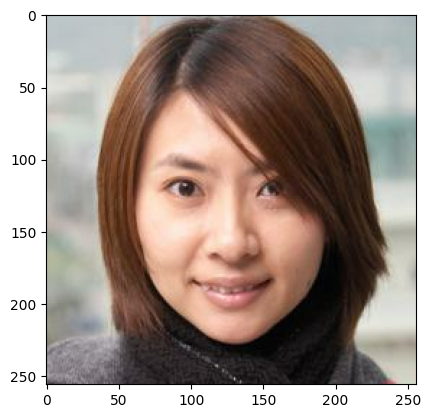

In [34]:
plt.figure()
plt.imshow(test_image * 0.5 + 0.5)
plt.show()

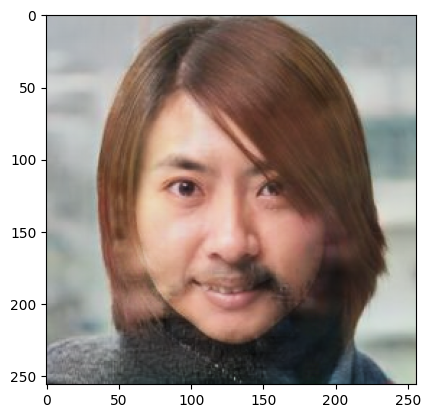

In [35]:
gen_output = gen_f2m(tf.expand_dims(test_image, 0), training=False)
plt.imshow(gen_output[0] * 0.5 + 0.5)
plt.show()